<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="380" alt="Skills Network Logo">
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [1]:
#!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

Connect to the database.


In [2]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") 
# open a database connection

Import pandas module.


In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('_m3_survey_data.csv')

In [5]:
# Write the dataframe to the SQLite database
df.to_sql('master', conn, if_exists='replace', index=False)

# Close the connection
conn.close()

## Demo: How to run an sql query


In [6]:
# open a database connection
conn = sqlite3.connect("m4_survey_data.sqlite") 


In [7]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,9079


## Demo: How to list all tables


In [8]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,master


## Demo: How to run a group by query


In [9]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,16.0,3
1,17.0,4
2,18.0,23
3,19.0,68
4,20.0,91
5,21.0,177
6,22.0,337
7,22.5,1
8,23.0,497
9,24.0,589


## Demo: How to describe a table


In [10]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"Unnamed: 0.1" INTEGER,
  "Unnamed: 0" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "EduOther" TEXT,
  "OrgSize" TEXT,
  "DevType" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "LastInt" TEXT,
  "FizzBuzz" TEXT,
  "JobFactors" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkPlan" TEXT,
  "WorkChallenge" TEXT,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "LanguageWorkedWith" TEXT,
  "LanguageDesireNextY

In [11]:
# Close the connection
conn.close()

# Hands-on Lab


## Visualizing distribution of data


In [12]:
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv('_m3_survey_data.csv')

### Histograms


Plot a histogram of `ConvertedComp.`


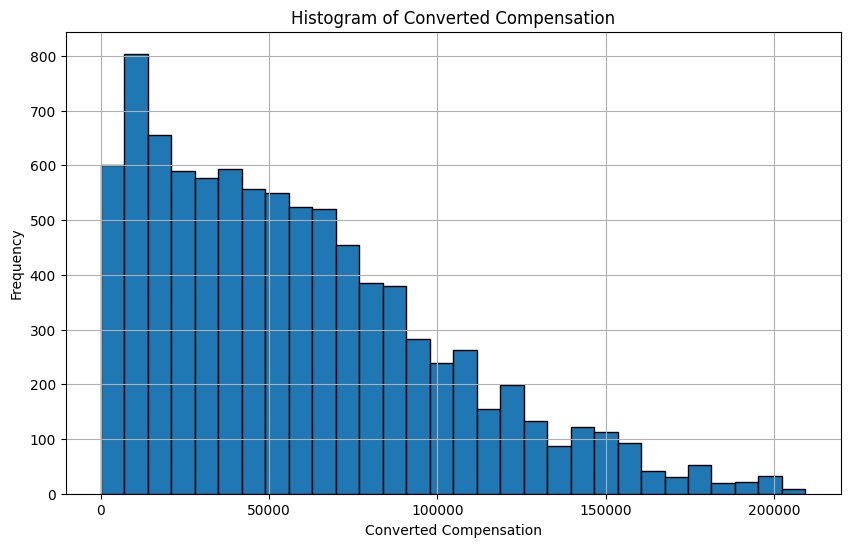

In [14]:
# Plot the histogram of ConvertedComp
plt.figure(figsize=(10, 6))
plt.hist(df['ConvertedComp'].dropna(), bins=30, edgecolor='black')
plt.title('Histogram of Converted Compensation')
plt.xlabel('Converted Compensation')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Box Plots


Plot a box plot of `Age.`


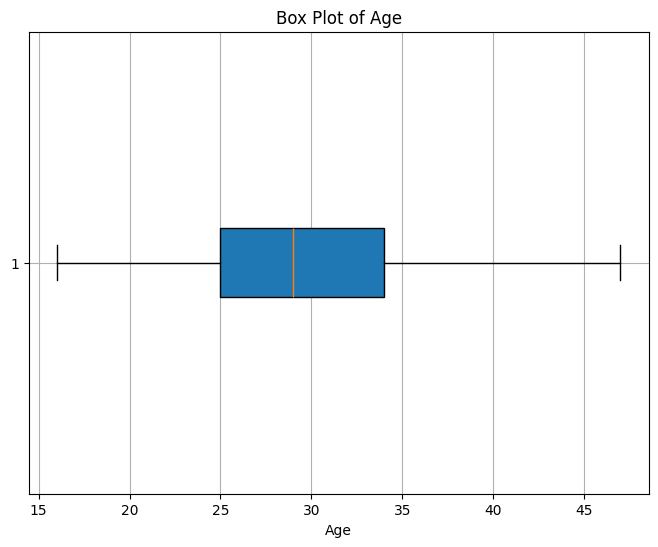

In [15]:
# Plot the box plot of Age
plt.figure(figsize=(8, 6))
plt.boxplot(df['Age'].dropna(), vert=False, patch_artist=True)
plt.title('Box Plot of Age')
plt.xlabel('Age')
plt.grid(True)
plt.show()


## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


In [16]:
df.WorkWeekHrs.unique()

array([ 80.  ,  32.  ,  40.  ,  45.  ,   8.  , 140.  ,  50.  ,  39.  ,
        42.  ,   7.  ,  46.  ,  70.  ,  38.  ,  44.  ,   6.  ,  75.  ,
        48.  ,  35.  , 160.  ,  37.  ,  30.  ,  36.  ,  34.  ,  98.  ,
        60.  ,  37.5 ,  20.  ,  24.  ,  55.  , 100.  ,  43.  ,  41.  ,
        38.5 ,   9.  ,  42.5 ,  10.  ,  52.  ,   8.5 ,  12.  ,  33.  ,
        36.2 ,  47.  ,  49.  , 168.  ,  65.  ,   7.25,  58.  ,   4.  ,
        25.  ,  36.25,   9.25,  11.  ,  76.  ,  15.  ,  36.5 ,  56.  ,
        62.  ,  41.5 ,  63.  ,  72.  ,  51.  , 150.  ,  90.  ,  54.  ,
        17.  ,  14.  ,  16.  ,  22.  ,   7.5 ,  29.  , 113.  ,  45.5 ,
        85.  ,  32.5 ,  18.  ,  66.  ,  57.  ,  64.  ,  41.2 ,  28.  ,
        47.5 ,  13.  ,  21.  ,  31.5 ,  79.  ,  84.  , 145.  ,  31.  ,
         5.  ,   6.3 ,  23.  ,  37.75,  19.  ,  34.5 ,   3.  ,  74.  ,
       130.  ,  36.75,   9.6 ,   8.2 , 165.  ,  33.5 ,  72.5 ,  61.  ])

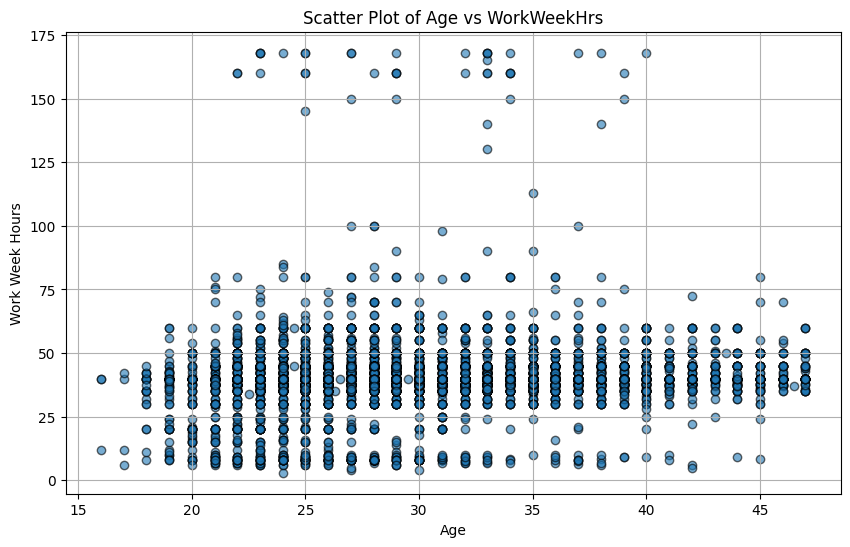

In [20]:
# Drop rows with NaN values in relevant columns
df_filtered = df[['Age', 'WorkWeekHrs']].dropna()

# Plot the scatter plot of Age vs WorkWeekHrs
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered['Age'], df_filtered['WorkWeekHrs'], alpha=0.6, edgecolors='black')
plt.title('Scatter Plot of Age vs WorkWeekHrs')
plt.xlabel('Age')
plt.ylabel('Work Week Hours')
plt.grid(True)
plt.show()


### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


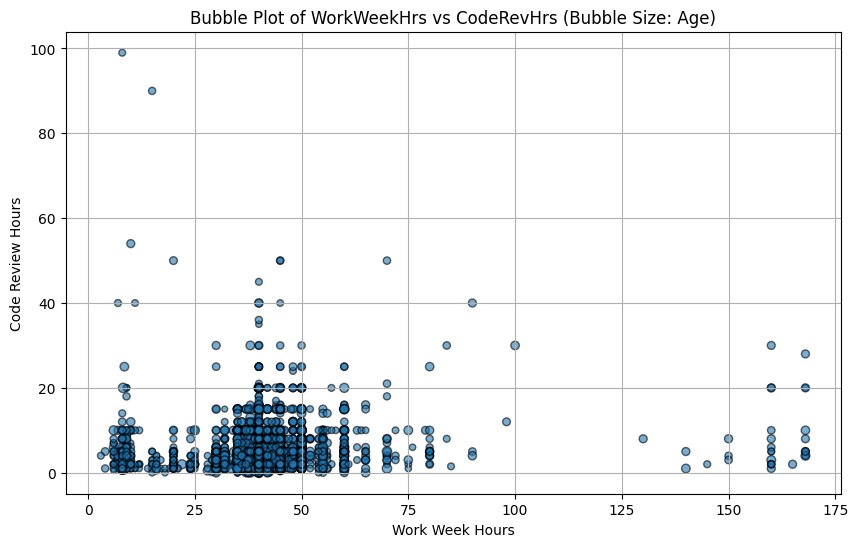

In [21]:
# Drop rows with NaN values in relevant columns
df_filtered = df[['WorkWeekHrs', 'CodeRevHrs', 'Age']].dropna()

# Create the bubble plot
plt.figure(figsize=(10, 6))
plt.scatter(
    df_filtered['WorkWeekHrs'],
    df_filtered['CodeRevHrs'],
    s=df_filtered['Age'],  # Scale the bubble size
    alpha=0.6,
    edgecolors='black'
)

# Add titles and labels
plt.title('Bubble Plot of WorkWeekHrs vs CodeRevHrs (Bubble Size: Age)')
plt.xlabel('Work Week Hours')
plt.ylabel('Code Review Hours')
plt.grid(True)
plt.show()


## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


In [ ]:
# your code goes here



### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


In [ ]:
# your code goes here



## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


In [ ]:
# your code goes here



### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


In [ ]:
# your code goes here



## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).


<!--## Change Log


<!--| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |--!>
